In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ch = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [2]:
ch.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
ch.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
ch.columns = ["Month","Sales"]

In [5]:
ch.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
ch.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
ch.drop(106,axis=0,inplace=True)

In [8]:
ch.drop(105,axis=0,inplace=True)

In [9]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [10]:
ch["Month"] = pd.to_datetime(ch["Month"])

In [11]:
ch["Year"] = ch["Month"].dt.year
ch["Months"] = ch["Month"].dt.month

In [12]:
ch.head()

,Month,Sales,Year,Months
0,1964-01-01,2815.0,1964,1
1,1964-02-01,2672.0,1964,2
2,1964-03-01,2755.0,1964,3
3,1964-04-01,2721.0,1964,4
4,1964-05-01,2946.0,1964,5


In [13]:
df = ch.copy()

In [14]:
df.set_index("Year",inplace=True)

In [15]:
df.head()

,Month,Sales,Months
Year,,,
1964,1964-01-01,2815.0,1
1964,1964-02-01,2672.0,2
1964,1964-03-01,2755.0,3
1964,1964-04-01,2721.0,4
1964,1964-05-01,2946.0,5


<AxesSubplot:xlabel='Year'>

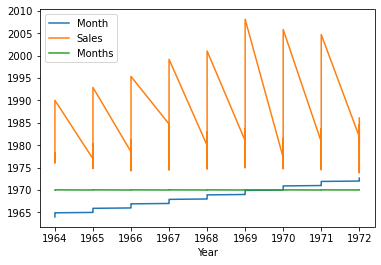

In [16]:
df.plot()

In [17]:
# This shows a seasonal trend

In [18]:
ch.set_index("Month",inplace=True)

In [19]:
ch.head()

,Sales,Year,Months
Month,,,
1964-01-01,2815.0,1964,1
1964-02-01,2672.0,1964,2
1964-03-01,2755.0,1964,3
1964-04-01,2721.0,1964,4
1964-05-01,2946.0,1964,5


In [20]:
ch.describe()

,Sales,Year,Months
count,105.000000,105.000000,105.000000
mean,4761.152381,1967.885714,6.371429
std,2553.502601,2.539360,3.428549
min,1413.000000,1964.000000,1.000000
25%,3113.000000,1966.000000,3.000000
50%,4217.000000,1968.000000,6.000000
75%,5221.000000,1970.000000,9.000000
max,13916.000000,1972.000000,12.000000


<AxesSubplot:xlabel='Month'>

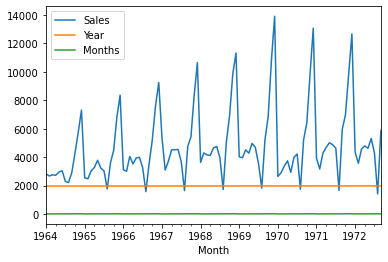

In [21]:
ch.plot()

In [22]:
# Checking for Stationarity using ADFULLER
from statsmodels.tsa.stattools import adfuller

In [23]:
#HO is not Stationary
#H1 it is stationary

adfuller(ch["Sales"])

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [24]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Stats","pvalue","lags used","No of observations used"]
    for value , label in zip(result,labels):
        print(label , str(value))

In [25]:
adfuller_test(ch["Sales"])

ADF Test Stats -1.8335930563276237
pvalue 0.3639157716602447
lags used 11
No of observations used 93


In [26]:
ch.drop(["Year","Months"],axis=1,inplace=True)

In [27]:
# So the data is not stationary
# Since it is a seasonal data we can difference it by 12

ch["Seasonal First Difference"] = ch["Sales"]-ch["Sales"].shift(12)

In [28]:
ch.head(20)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [29]:
# Checking for Stationarity

adfuller_test(ch["Seasonal First Difference"].dropna())

ADF Test Stats -7.626619157213163
pvalue 2.060579696813685e-11
lags used 0
No of observations used 92


<AxesSubplot:xlabel='Month'>

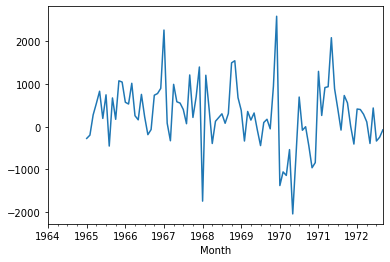

In [30]:
ch["Seasonal First Difference"].plot()

In [31]:
#Handy piece of code
ch.groupby('Month')['Sales'].describe()


,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1964-01-01,1.0,2815.0,NaN,2815.0,2815.0,2815.0,2815.0,2815.0
1964-02-01,1.0,2672.0,NaN,2672.0,2672.0,2672.0,2672.0,2672.0
1964-03-01,1.0,2755.0,NaN,2755.0,2755.0,2755.0,2755.0,2755.0
1964-04-01,1.0,2721.0,NaN,2721.0,2721.0,2721.0,2721.0,2721.0
1964-05-01,1.0,2946.0,NaN,2946.0,2946.0,2946.0,2946.0,2946.0
...,...,...,...,...,...,...,...,...
1972-05-01,1.0,4618.0,NaN,4618.0,4618.0,4618.0,4618.0,4618.0
1972-06-01,1.0,5312.0,NaN,5312.0,5312.0,5312.0,5312.0,5312.0
1972-07-01,1.0,4298.0,NaN,4298.0,4298.0,4298.0,4298.0,4298.0


In [32]:
ch.shape

train = ch[:85]
test = ch[85:]

In [33]:
!pip install pmdarima

In [34]:
from pmdarima import auto_arima
stepwise_fit =auto_arima(train["Seasonal First Difference"].dropna(),trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1205.819, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1194.382, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1203.852, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1186.164, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1186.810, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1184.172, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1192.408, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1184.800, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1174.455, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1172.661, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   73
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -583.570
Date:                Wed, 27 Oct 2021   AIC                           1171.141
Time:                        11:12:15   BIC                           1175.694
Sample:                             0   HQIC                          1172.953
                                 - 73                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9037      0.050    -18.222      0.000      -1.001      -0.806
sigma2      6.305e+05   8.23e+04      7.665      0.000    4.69e+05    7.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 5.49
Prob(Q):                              0.58   Prob(JB):                         0.06
Heteroskedasticity (H):               2.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
import statsmodels.api as sm
model =sm.tsa.statespace.SARIMAX(train["Seasonal First Difference"].dropna(),order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [36]:
model_fit = model.fit()


C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:          Seasonal First Difference   No. Observations:                   73
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -490.433
Date:                            Wed, 27 Oct 2021   AIC                            990.866
Time:                                    11:12:16   BIC                           1001.338
Sample:                                01-01-1965   HQIC                           994.962
                                     - 01-01-1971                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1581      0.142      1.113      0.266      -0.120       0.437
ma.L1         -0.9187      0.095   

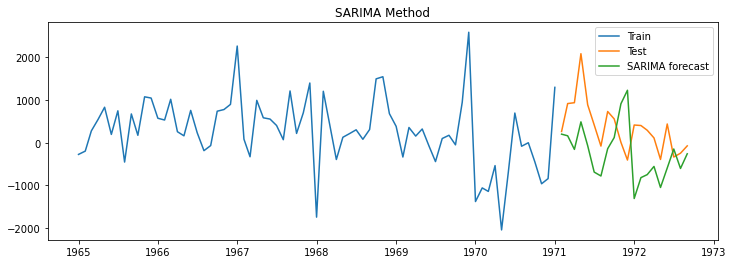

In [38]:
#Recover the Original Series and Predictions.

y_hat_sarima = train["Seasonal First Difference"].copy()
y_hat_sarima['sarima_forecast_diff'] = model_fit.predict(start=test.index.min(),end = test.index.max(),dynamic=False)
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_arima_nine['arima_forecast_boxcox_diff'].cumsum()
#y_hat_arima_nine['arima_forecast_boxcox'] = y_hat_arima_nine['arima_forecast_boxcox'].add(train_boxcox_nine['Sales'][0])
#y_hat_arima_nine["arima_forecast"] = np.exp(y_hat_arima_nine['arima_forecast_boxcox'])

# Plotting Train, Test and Forecast

plt.figure(figsize=(12,4))
plt.plot(ch['Seasonal First Difference'][:85], label='Train')
plt.plot(ch['Seasonal First Difference'][85:], label='Test')
plt.plot(y_hat_sarima['sarima_forecast_diff'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMA Method')
plt.show()

In [39]:
# Metrics 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Seasonal First Difference'], y_hat_sarima['sarima_forecast_diff'][85:])).round(2)
mape = np.round(np.mean(np.abs(test['Seasonal First Difference']-y_hat_sarima['sarima_forecast_diff'][85:])/test['Seasonal First Difference'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.DataFrame(tempResults)
results = results[['Method', 'RMSE', 'MAPE']]
results

ValueError: Found input variables with inconsistent numbers of samples: [20, 0]

In [40]:
from pandas.tseries.offsets import DateOffset

In [41]:
future_dates = [ch.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [42]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=ch.columns)

In [43]:
future_dates_df.tail()

,Sales,Seasonal First Difference
1974-04-01,NaN,NaN
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN
1974-08-01,NaN,NaN


In [44]:
new_ch =pd.concat([ch,future_dates_df])

In [45]:
new_ch["forecast"] = model_fit.predict(start=104,end=120,dynamic=True)

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

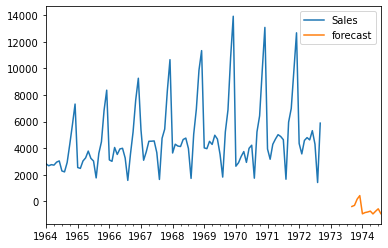

In [46]:
new_ch[["Sales","forecast"]].plot()

In [ ]:
# Have to tune the model